In [1]:
import json
import os 
os.chdir('./code/paper')     

In [ ]:
# install libraries required by CounTR. Version is specified as they force it via assertion. (example assert(timm_version = 0.3.2))
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install timm==0.3.2
!pip install numpy
!pip install matplotlib tqdm 
!pip install tensorboard
!pip install scipy
!pip install imgaug
!pip install opencv-python
!pip3 install hub

## Finetune
--- 
Next cells are not "coded": this notebook was used to document the finetuning of the model run on CounTR original code, adapted to our case. Important code is in the two scripts we use: **GALAXY_finetune.py**, **GALAXY_testing.py** and **utils/galaxy_augmentation.py**. 

In the next cells you will find logs of the finetuning, both for training and test.

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python GALAXY_finetune.py --resume ../../weights/pretrain_uncorr.pth --epochs 100 --blr 2e-4 --weight_decay 0.05  --batch 32 --data_path ../../data/GalaxiesV2 --output_dir ../../output/loro_aug_100_epoche/output --log_dir ../../output/loro_aug_100_epoche/logs

In [ ]:
import json

losses = []
mae = []
rmse = []

with open('./output/loro_aug_100_epoche/output/log.txt', 'r') as log_file:
  logs = log_file.readlines()
for log in logs :
  log = json.loads(log)
  losses.append(log['train_loss'])
  mae.append(log['Current MAE'])
  rmse.append(log['RMSE'])

In [ ]:
import matplotlib.pyplot as plt

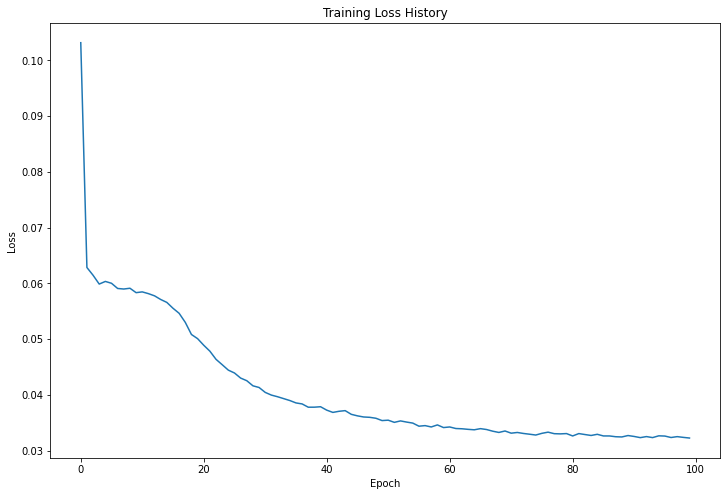

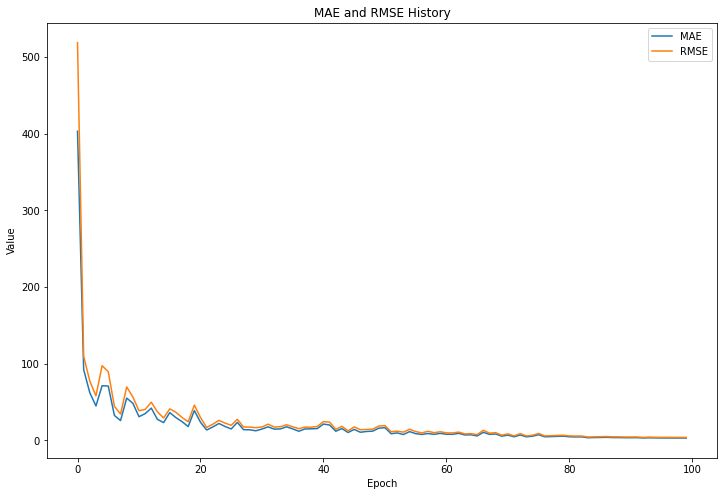

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(losses, label = 'Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.show()

plt.figure(figsize=(12,8))
plt.title('MAE and RMSE History')
plt.plot(mae, label = 'MAE')
plt.plot(rmse, label = 'RMSE')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

Here you saw the metrics of training. It seems they might be promising, but without validation and with the current data augmentation pipeline / loss and so on the model overfits a lot.  
Let's see how it performs in testing:

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python GALAXY_testing.py --resume ../../output/paper/output/checkpoint-666.pth --output_dir ../../output/loro_aug_100_epoche/testing/out --log_dir ../../output/loro_aug_100_epoche/testing/log

After tidying up the work, the results of this notebook are now in output/paper